<a href="https://colab.research.google.com/github/mrsalty/unibo-ai/blob/main/StrokePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FAIKR - Module 3



## Stroke prediction dataset

Purpose of this project is to demonstrate how to use Bayesian Networks and perform domain knowledge queries via exact and approximate inference.

For this task the [`Stroke prediction dataset`](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset) was chosen as it's a dataset with few features, so good for a representative use for a Bayesian Network example. The dataset also covers a domain where it's easy find online papers and documentation to support the process of building the network dependencies and layout.

The solution is built using the [pgmpy library](https://pgmpy.org/).


## Load data, preprocessing and visualisation

In [ ]:
# install pgmpy and networkx (lib for drawing graphs)
!pip install pgmpy
!pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 5.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

In [ ]:
from pandas import read_csv
import pandas as pd
import numpy as np

df_orig = read_csv("healthcare-dataset-stroke-data.csv")
df_orig.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df_orig.shape

(5110, 12)

### Features

*   gender : `male`, `female`, `other`
*   age: `[0,82]`
*   hypertension: `boolean`
*   heart_disease: `boolean`
*   ever_married: `yes`, `no`
*   work_type: `Private`, `Self-employed`, `Govt_job`, `children`, `Never_worked`
*   Residence_type: `Urban`, `Rural`
*   avg_glucose_level: `[~50, ~300]` (healthy: < 140 mg/dL)
*   bmi: `[~10,~65]` $(kg/m^2)$ (healthy:  ~18.5 to ~25)
*   smoking_status: `formerly smoked`, `never smoked`, `smokes`, `Unknown`
*   stroke: `boolean` 







### Plot data

#### Age distribution

(array([255., 179., 154., 208., 229., 211., 228., 256., 231., 366., 301.,
        282., 344., 342., 296., 263., 210., 197., 185., 373.]),
 array([8.0000e-02, 4.1760e+00, 8.2720e+00, 1.2368e+01, 1.6464e+01,
        2.0560e+01, 2.4656e+01, 2.8752e+01, 3.2848e+01, 3.6944e+01,
        4.1040e+01, 4.5136e+01, 4.9232e+01, 5.3328e+01, 5.7424e+01,
        6.1520e+01, 6.5616e+01, 6.9712e+01, 7.3808e+01, 7.7904e+01,
        8.2000e+01]),
 <a list of 20 Patch objects>)

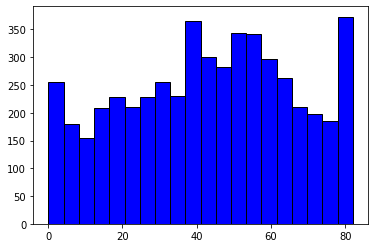

In [ ]:
# age  distribution
import matplotlib.pyplot as plt
plt.hist(df_orig['age'], color = 'blue', edgecolor = 'black', bins = 20)

#### Gender distribution

(array([2.115e+03, 2.994e+03, 1.000e+00]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 <a list of 3 Patch objects>)

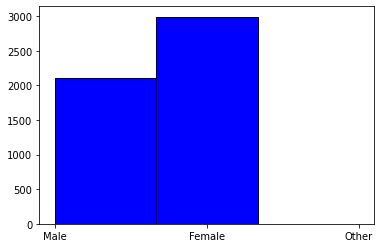

In [ ]:
plt.hist(df_orig['gender'], color = 'blue', edgecolor = 'black', bins = 3)

#### Glucose level distribution

(array([523., 727., 957., 833., 571., 385., 202., 108.,  90.,  64.,  44.,
         47.,  78., 131., 114., 103.,  73.,  35.,  17.,   8.]),
 array([ 55.12 ,  65.951,  76.782,  87.613,  98.444, 109.275, 120.106,
        130.937, 141.768, 152.599, 163.43 , 174.261, 185.092, 195.923,
        206.754, 217.585, 228.416, 239.247, 250.078, 260.909, 271.74 ]),
 <a list of 20 Patch objects>)

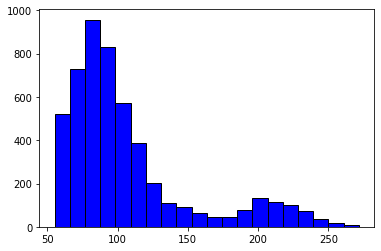

In [ ]:
# glucose level  distribution
plt.hist(df_orig['avg_glucose_level'], color = 'blue', edgecolor = 'black', bins = 20)

#### Bmi distribution

(array([3.700e+01, 3.740e+02, 7.540e+02, 1.210e+03, 1.118e+03, 6.910e+02,
        3.700e+02, 2.050e+02, 6.700e+01, 3.800e+01, 3.100e+01, 6.000e+00,
        4.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00]),
 array([10.3  , 14.665, 19.03 , 23.395, 27.76 , 32.125, 36.49 , 40.855,
        45.22 , 49.585, 53.95 , 58.315, 62.68 , 67.045, 71.41 , 75.775,
        80.14 , 84.505, 88.87 , 93.235, 97.6  ]),
 <a list of 20 Patch objects>)

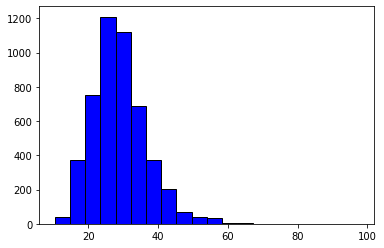

In [ ]:
# bmi distribution
plt.hist(df_orig['bmi'], color = 'blue', edgecolor = 'black', bins = 20)

#### Smoking ststus distribution

(array([ 885., 1892.,  789., 1544.]),
 array([0.  , 0.75, 1.5 , 2.25, 3.  ]),
 <a list of 4 Patch objects>)

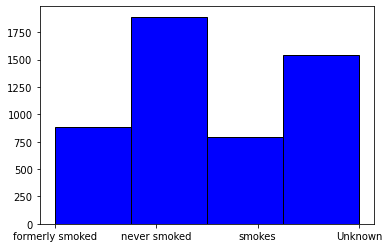

In [ ]:
plt.hist(df_orig['smoking_status'], color = 'blue', edgecolor = 'black', bins = 4)

In [ ]:
# unique values for `work_type` column
df_orig['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [ ]:
# unique values for `Residence_type` column
df_orig['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [ ]:
# unique values for `smoking_status` column
df_orig['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

### Discretize 

Discretisation of some feature values:

*   `age` -> `0-20`, `20-40`, `40-60`, `60-80`, `80+`
*   `bmi` -> `low`, `normal`, `high`, `very high`
*   `avg_glucose_level` -> `low`, `normal`, `high`

In [ ]:
# remove column `id` and rename column name for casing consistency 
df=df_orig.drop(columns=['id'])
df.rename(
    columns=({ 'Residence_type': 'residence_type'}), 
    inplace=True,
)

In [ ]:
df['age']=pd.cut(x=df_orig['age'], bins=[np.min(df['age']),20,40,60,80, np.max(df['age'])],labels=["0-20","20-40","40-60","60-80","80+"])

In [ ]:
df['bmi']=pd.cut(x=df_orig['bmi'], bins=[np.min(df['bmi']),18,25,40, np.max(df['bmi'])],labels=["low","normal","high", "vey high"])

In [ ]:
df['avg_glucose_level']=pd.cut(x=df_orig['avg_glucose_level'], bins=[np.min(df['avg_glucose_level']),80,140,np.max(df['avg_glucose_level'])],labels=["low","normal","high"])

## Build the Bayesian network

We will first build and manually draw the graph of our network to visualise the structure and better understand dependencies and relations. For this purpose [DAFT library](https://docs.daft-pgm.org/en/latest/) was used.

The dependencies were defined after a small research on causal effects between the features of the dataset. 

It's important to underline how crucial for defining dependencies in a Bayesian network is a domain expert, therefore these dependencies have to be taken with the right approximation.

This is a list of the dependencies defined and  links to papers and docs used to support them:

*   [Gender -> Glucose](https://www.oatext.com/Gender-differences-in-foods-uptakes-glycemic-index-BMI-and-various-plasma-parameters-between-young-men-and-women-in-Japan.php)  
*   [Age -> BMI](https://www.medicalnewstoday.com/articles/323543#:~:text=For%20adults%20ages%2020%20years,person%20with%20an%20equal%20BMI)
*   [Smoking -> Hypertension](https://www.ahajournals.org/doi/10.1161/01.hyp.37.2.187)
*   [BMI -> Hypertension](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6316192/#:~:text=We%20found%20a%20gradient%20of,of%20other%20clinical%20risk%20factors.)
*  [Glucose -> BMI](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4048595/)   
*  [Glucose -> Hypertension](https://www.medicalnewstoday.com/articles/317220)
*  [Married status -> Hypertension](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6476533/#:~:text=We%20found%20that%20the%20relationship,factor%20for%20mortality%20in%20men.)
*   [Work type -> Heart disease](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6005906/) 
*   [Residence type -> Heart disease](https://jamanetwork.com/journals/jama/fullarticle/2765719)
*  [Glucose -> Heart disease ](https://www.cdc.gov/diabetes/library/features/diabetes-and-heart.html)
*  [Hypertension -> Stroke](https://pubmed.ncbi.nlm.nih.gov/12496672/)
*  [Heart disease -> Stroke](https://www.cdc.gov/stroke/risk_factors.htm)



### Draw the graph

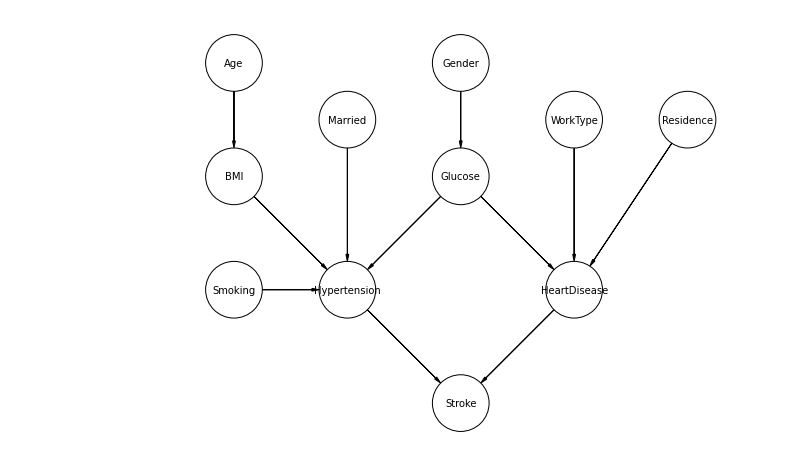

In [ ]:
import daft
import matplotlib.pyplot as plt
from daft import PGM

pgm = PGM(shape=[14,8], node_unit=2, grid_unit=2)

pgm.add_node(daft.Node('Gender', r"Gender", 8, 7))
pgm.add_node(daft.Node('Age', r"Age", 4, 7))
pgm.add_node(daft.Node('Hypertension', r"Hypertension", 6, 3))
pgm.add_node(daft.Node('HeartDisease', r"HeartDisease", 10, 3))
pgm.add_node(daft.Node('Married', r"Married", 6, 6))
pgm.add_node(daft.Node('WorkType', r"WorkType", 10, 6))
pgm.add_node(daft.Node('Residence', r"Residence", 12, 6))
pgm.add_node(daft.Node('Glucose', r"Glucose", 8, 5))
pgm.add_node(daft.Node('BMI', r"BMI", 4, 5))
pgm.add_node(daft.Node('Smoking', r"Smoking", 4, 3))
pgm.add_node(daft.Node('Stroke', r"Stroke", 8, 1)
)
pgm.add_edge('Gender', 'Glucose')
pgm.add_edge('Age', 'BMI')
pgm.add_edge('Glucose', 'Hypertension')
pgm.add_edge('Smoking', 'Hypertension')
pgm.add_edge('BMI', 'Hypertension')
pgm.add_edge('Married', 'Hypertension')
pgm.add_edge('WorkType', 'HeartDisease')
pgm.add_edge('Residence', 'HeartDisease')
pgm.add_edge('Glucose', 'HeartDisease')
pgm.add_edge('Hypertension', 'Stroke')
pgm.add_edge('HeartDisease', 'Stroke')

pgm.render()

### Build the network and analyse it

In [ ]:
# create the bayesian network
from pgmpy.models import BayesianModel

model = BayesianModel([('age', 'bmi'),
                       ('smoking_status', 'hypertension'),
                       ('ever_married', 'hypertension'),
                       ('gender', 'avg_glucose_level'),
                       ('work_type', 'heart_disease'),
                       ('residence_type', 'heart_disease'),
                       ('bmi', 'hypertension'),
                       ('avg_glucose_level', 'hypertension'),
                       ('avg_glucose_level', 'heart_disease'),
                       ('hypertension', 'stroke'),
                       ('heart_disease', 'stroke')])

/usr/local/lib/python3.7/dist-packages/pgmpy/models/BayesianModel.py:10: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  FutureWarning,


In [ ]:
# visualise nodes
model.nodes()

NodeView(('age', 'bmi', 'smoking_status', 'hypertension', 'ever_married', 'gender', 'avg_glucose_level', 'work_type', 'heart_disease', 'residence_type', 'stroke'))

In [ ]:
# visualise edges
model.edges()

OutEdgeView([('age', 'bmi'), ('bmi', 'hypertension'), ('smoking_status', 'hypertension'), ('hypertension', 'stroke'), ('ever_married', 'hypertension'), ('gender', 'avg_glucose_level'), ('avg_glucose_level', 'hypertension'), ('avg_glucose_level', 'heart_disease'), ('work_type', 'heart_disease'), ('heart_disease', 'stroke'), ('residence_type', 'heart_disease')])

In [ ]:
# an example of how to visualise local independencies
model.local_independencies("hypertension")

(hypertension ⟂ gender, heart_disease, residence_type, age, work_type | avg_glucose_level, bmi, smoking_status, ever_married)

In [ ]:
# an example of how to visualise local independencies
model.local_independencies("heart_disease")

(heart_disease ⟂ gender, bmi, hypertension, smoking_status, ever_married, age | avg_glucose_level, residence_type, work_type)

In [ ]:
# an example of a markov blanket
model.get_markov_blanket("heart_disease")

['avg_glucose_level', 'hypertension', 'stroke', 'residence_type', 'work_type']

### Parameter learning 

Given the dataset we want now to learn the parameters and define the CPDs.

In order to fit our model we need to define an estimator. Pgmpy library implements a few of them: Maximum Likelihood, Bayesian estimation, Expectation Maximization and Structural Equation Model Estimators. For the current model [`Bayesian Estimator`](https://pgmpy.org/param_estimator/bayesian_est.html) was chosen.



In [ ]:
from pgmpy.estimators import BayesianEstimator

model.cpds = []
model.fit(data=df, estimator=BayesianEstimator, prior_type="BDeu")

for cpd in model.get_cpds():
    print(f'CPT - {cpd.variable}:')
    print(cpd, '\n')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


CPT - age:
+------------+-----------+
| age(0-20)  | 0.203259  |
+------------+-----------+
| age(20-40) | 0.241141  |
+------------+-----------+
| age(40-60) | 0.307332  |
+------------+-----------+
| age(60-80) | 0.224644  |
+------------+-----------+
| age(80+)   | 0.0236253 |
+------------+-----------+ 

CPT - bmi:
+---------------+-----+---------------------+
| age           | ... | age(80+)            |
+---------------+-----+---------------------+
| bmi(high)     | ... | 0.6745689655172413  |
+---------------+-----+---------------------+
| bmi(low)      | ... | 0.01939655172413793 |
+---------------+-----+---------------------+
| bmi(normal)   | ... | 0.28663793103448276 |
+---------------+-----+---------------------+
| bmi(vey high) | ... | 0.01939655172413793 |
+---------------+-----+---------------------+ 

CPT - smoking_status:
+---------------------------------+----------+
| smoking_status(Unknown)         | 0.30168  |
+---------------------------------+----------+
| smokin

In [ ]:
# CPT example for `smoking_status`
print(model.get_cpds(node="smoking_status"))

+---------------------------------+----------+
| smoking_status(Unknown)         | 0.30168  |
+---------------------------------+----------+
| smoking_status(formerly smoked) | 0.170723 |
+---------------------------------+----------+
| smoking_status(never smoked)    | 0.37724  |
+---------------------------------+----------+
| smoking_status(smokes)          | 0.150356 |
+---------------------------------+----------+


In [ ]:
# CPT example for `bmi`
print(model.get_cpds(node="bmi"))

+---------------+-----+---------------------+
| age           | ... | age(80+)            |
+---------------+-----+---------------------+
| bmi(high)     | ... | 0.6745689655172413  |
+---------------+-----+---------------------+
| bmi(low)      | ... | 0.01939655172413793 |
+---------------+-----+---------------------+
| bmi(normal)   | ... | 0.28663793103448276 |
+---------------+-----+---------------------+
| bmi(vey high) | ... | 0.01939655172413793 |
+---------------+-----+---------------------+


In [ ]:
# check validity of the model 
model.check_model()

True

In [ ]:
model.get_cardinality()

defaultdict(int,
            {'age': 5,
             'avg_glucose_level': 3,
             'bmi': 4,
             'ever_married': 2,
             'gender': 3,
             'heart_disease': 2,
             'hypertension': 2,
             'residence_type': 2,
             'smoking_status': 4,
             'stroke': 2,
             'work_type': 5})

## Exact Inference

*Variable Elimination* method was chosen to achieve exact inference as it allows to reduce computation complexity if compared to simple *Enumeration* algorithm.

### Variable elimination

Variable elimination works, given a Bayesian network query, via summation *right-to-left*, storing intermediate results named *factors*, over which we can define the product operation such as:

>$f_1(a,b) × f_2(b,c) = f(a, b, c) $  

The product operation allows to compose factors into aggregates, over which *variable elimination* is carried via summing out all values for shared factor variables. 

Example, given the query:

> $P(B|j,m) = α f_1(B) × \sum_{e} f_2(E) × \sum_a f_3(A,B,E) × f_4(A) × f_5(A)$

We sum out ***A*** from the product of $f_3, f_4\space and \space f_5$:

> $ f_6(B,E) = $
> $\sum_af_3(A,B,E) × f_4(A) × f_5(A) = $
> $(f_3(a,B,E) × f_4(a) × f_5(a)) + (f_3(¬a,B,E) × f_4(¬a) × f_5(¬a))$




In [ ]:
from pgmpy.inference import VariableElimination
infer = VariableElimination(model)

### Queries

#### Hypertension given `age=80+`

In [ ]:
print(infer.query(["hypertension"],evidence={"age": 4}))


/usr/local/lib/python3.7/dist-packages/pgmpy/factors/discrete/DiscreteFactor.py:542: UserWarning: Found unknown state name. Trying to switch to using all state names as state numbers
  UserWarning,


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

+-----------------+---------------------+
| hypertension    |   phi(hypertension) |
+=================+=====================+
| hypertension(0) |              0.9128 |
+-----------------+---------------------+
| hypertension(1) |              0.0872 |
+-----------------+---------------------+


#### Hypertension given `age=80+` and `skmoking_status=smokes`

In [ ]:
print(infer.query(["hypertension"],evidence={"age": 3, "smoking_status" : 'smokes'}))

/usr/local/lib/python3.7/dist-packages/pgmpy/factors/discrete/DiscreteFactor.py:542: UserWarning: Found unknown state name. Trying to switch to using all state names as state numbers
  UserWarning,


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

+-----------------+---------------------+
| hypertension    |   phi(hypertension) |
+=================+=====================+
| hypertension(0) |              0.8895 |
+-----------------+---------------------+
| hypertension(1) |              0.1105 |
+-----------------+---------------------+


#### Hypertension given `age=60-80` and `skmoking_status=smokes` and `bmi=very high`

In [ ]:
print(infer.query(["hypertension"],evidence={"age": 3, "smoking_status" : 'smokes', "bmi" : 3}))

/usr/local/lib/python3.7/dist-packages/pgmpy/factors/discrete/DiscreteFactor.py:542: UserWarning: Found unknown state name. Trying to switch to using all state names as state numbers
  UserWarning,


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

+-----------------+---------------------+
| hypertension    |   phi(hypertension) |
+=================+=====================+
| hypertension(0) |              0.8786 |
+-----------------+---------------------+
| hypertension(1) |              0.1214 |
+-----------------+---------------------+


#### Hypertension given `age=0-20` and `skmoking_status=never smoked` and `bmi=normal`

In [ ]:
print(infer.query(["hypertension"],evidence={"age": 0, "smoking_status" : 'never smoked', "bmi" : 1}))

/usr/local/lib/python3.7/dist-packages/pgmpy/factors/discrete/DiscreteFactor.py:542: UserWarning: Found unknown state name. Trying to switch to using all state names as state numbers
  UserWarning,


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

+-----------------+---------------------+
| hypertension    |   phi(hypertension) |
+=================+=====================+
| hypertension(0) |              0.9428 |
+-----------------+---------------------+
| hypertension(1) |              0.0572 |
+-----------------+---------------------+


#### Stroke risk given `hypertension=1` 

In [ ]:
print(infer.query(["stroke"],evidence={"hypertension": 1}))

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

+-----------+---------------+
| stroke    |   phi(stroke) |
+===========+===============+
| stroke(0) |        0.8697 |
+-----------+---------------+
| stroke(1) |        0.1303 |
+-----------+---------------+


#### Stroke risk given `heart_disease=1`

In [ ]:
print(infer.query(["stroke"],evidence={"heart_disease": 1}))

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

+-----------+---------------+
| stroke    |   phi(stroke) |
+===========+===============+
| stroke(0) |        0.8366 |
+-----------+---------------+
| stroke(1) |        0.1634 |
+-----------+---------------+


#### Stroke risk given `hypertension=1` and `heart_disease=1`

In [ ]:
print(infer.query(["stroke"],evidence={"hypertension":1, "heart_disease": 1}))

0it [00:00, ?it/s]

0it [00:00, ?it/s]

+-----------+---------------+
| stroke    |   phi(stroke) |
+===========+===============+
| stroke(0) |        0.8038 |
+-----------+---------------+
| stroke(1) |        0.1962 |
+-----------+---------------+


#### Stroke risk given `hypertension=0` and `heart_disease=0`

In [ ]:
print(infer.query(["stroke"],evidence={"hypertension":0, "heart_disease": 0}))

0it [00:00, ?it/s]

0it [00:00, ?it/s]

+-----------+---------------+
| stroke    |   phi(stroke) |
+===========+===============+
| stroke(0) |        0.9718 |
+-----------+---------------+
| stroke(1) |        0.0282 |
+-----------+---------------+


## Approximate Inference

Growing complexity of a network makes exact inference computationally intractable. 

*Approximate inference* approach tries to tackle this problem with a stochastic approach. For this task three sampling methods have been implemented:

* *Likelihood sampling*
* *Rejection sampling*
* *Gibbs sampling*

Sampling is carried via [`BayesianModelSampling`](https://pgmpy.org/approx_infer/bn_sampling.html) which generates weighted sample(s) from joint distribution of the bayesian network, that comply with the given evidence.

In [ ]:
from pgmpy.inference import ApproxInference
from pgmpy.sampling import BayesianModelSampling
from pgmpy.factors.discrete import State

infer = ApproxInference(model)
inference = BayesianModelSampling(model)

In [ ]:
# Sampling from an empty network
print(infer.query(variables=["stroke"], n_samples=100)) 

  0%|          | 0/11 [00:00<?, ?it/s]

+-----------+---------------+
| stroke    |   phi(stroke) |
+===========+===============+
| stroke(0) |        0.9300 |
+-----------+---------------+
| stroke(1) |        0.0700 |
+-----------+---------------+


/usr/local/lib/python3.7/dist-packages/pgmpy/utils/mathext.py:84: UserWarning: Probability values don't exactly sum to 1. Differ by: 1.1102230246251565e-16. Adjusting values.
  f"Probability values don't exactly sum to 1. Differ by: {error}. Adjusting values."


In [ ]:
# example of results for the sampling process
print(inference.likelihood_weighted_sample(size=5)) 

  0%|          | 0/11 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/pgmpy/utils/mathext.py:84: UserWarning: Probability values don't exactly sum to 1. Differ by: 1.1102230246251565e-16. Adjusting values.
  f"Probability values don't exactly sum to 1. Differ by: {error}. Adjusting values."


     age     bmi   smoking_status  hypertension ever_married  gender  \
0  60-80    high          Unknown             0          Yes    Male   
1  60-80  normal  formerly smoked             0           No  Female   
2  40-60    high  formerly smoked             0          Yes  Female   
3  40-60  normal     never smoked             1          Yes    Male   
4  40-60    high           smokes             0          Yes  Female   

  avg_glucose_level      work_type  heart_disease residence_type  stroke  \
0            normal        Private              0          Urban       0   
1            normal       children              0          Urban       0   
2            normal  Self-employed              1          Rural       1   
3               low  Self-employed              0          Rural       0   
4            normal        Private              0          Urban       0   

   _weight  
0      1.0  
1      1.0  
2      1.0  
3      1.0  
4      1.0  


#### Approximate inference convergence

In [ ]:
# convergence with increasing number of samples
print(infer.query(variables=["stroke"], n_samples=50)) # approximate inference small samples
print(infer.query(variables=["stroke"], n_samples=10000)) # approximate inference larger samples
print(VariableElimination(model).query(["stroke"]))  # exact inference

  0%|          | 0/11 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/pgmpy/utils/mathext.py:84: UserWarning: Probability values don't exactly sum to 1. Differ by: 1.1102230246251565e-16. Adjusting values.
  f"Probability values don't exactly sum to 1. Differ by: {error}. Adjusting values."


+-----------+---------------+
| stroke    |   phi(stroke) |
+===========+===============+
| stroke(0) |        0.9400 |
+-----------+---------------+
| stroke(1) |        0.0600 |
+-----------+---------------+


  0%|          | 0/11 [00:00<?, ?it/s]

+-----------+---------------+
| stroke    |   phi(stroke) |
+===========+===============+
| stroke(0) |        0.9565 |
+-----------+---------------+
| stroke(1) |        0.0435 |
+-----------+---------------+


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

+-----------+---------------+
| stroke    |   phi(stroke) |
+===========+===============+
| stroke(0) |        0.9568 |
+-----------+---------------+
| stroke(1) |        0.0432 |
+-----------+---------------+


### Likelihood weighted sampling

*Likelihood weighted sampling* fixes evidence variables and samples only non-evidence ones, weight each sample by the likelihood of the evidence.

In [ ]:
# likelihood weighted sampling
print(infer.get_distribution(inference.likelihood_weighted_sample( size=50), ["stroke"], joint=True))

  0%|          | 0/11 [00:00<?, ?it/s]

+-----------+---------------+
| stroke    |   phi(stroke) |
+===========+===============+
| stroke(0) |        0.9200 |
+-----------+---------------+
| stroke(1) |        0.0800 |
+-----------+---------------+


/usr/local/lib/python3.7/dist-packages/pgmpy/utils/mathext.py:84: UserWarning: Probability values don't exactly sum to 1. Differ by: 1.1102230246251565e-16. Adjusting values.
  f"Probability values don't exactly sum to 1. Differ by: {error}. Adjusting values."


### Rejection sampling

*Rejection sampling* rejects all samples not matching with evidence.

In [ ]:
# rejection sampling
print(infer.get_distribution(inference.rejection_sample( size=100), ["stroke"]))

  0%|          | 0/11 [00:00<?, ?it/s]

+-----------+---------------+
| stroke    |   phi(stroke) |
+===========+===============+
| stroke(0) |        0.9700 |
+-----------+---------------+
| stroke(1) |        0.0300 |
+-----------+---------------+


/usr/local/lib/python3.7/dist-packages/pgmpy/utils/mathext.py:84: UserWarning: Probability values don't exactly sum to 1. Differ by: 1.1102230246251565e-16. Adjusting values.
  f"Probability values don't exactly sum to 1. Differ by: {error}. Adjusting values."


### Gibbs sampling

*Gibbs sampling* samples all variables in turns, given all other variables.

In [ ]:
# Gibbs sampling
from pgmpy.sampling import GibbsSampling
gibbs = GibbsSampling(model)
print(infer.get_distribution(gibbs.sample(size=50), ["stroke"] ))

/usr/local/lib/python3.7/dist-packages/pgmpy/factors/discrete/DiscreteFactor.py:542: UserWarning: Found unknown state name. Trying to switch to using all state names as state numbers
  UserWarning,


  0%|          | 0/49 [00:00<?, ?it/s]

+-----------+---------------+
| stroke    |   phi(stroke) |
+===========+===============+
| stroke(0) |        0.9200 |
+-----------+---------------+
| stroke(1) |        0.0800 |
+-----------+---------------+


/usr/local/lib/python3.7/dist-packages/pgmpy/utils/mathext.py:84: UserWarning: Probability values don't exactly sum to 1. Differ by: 1.1102230246251565e-16. Adjusting values.
  f"Probability values don't exactly sum to 1. Differ by: {error}. Adjusting values."
/usr/local/lib/python3.7/dist-packages/pgmpy/utils/mathext.py:84: UserWarning: Probability values don't exactly sum to 1. Differ by: -2.220446049250313e-16. Adjusting values.
  f"Probability values don't exactly sum to 1. Differ by: {error}. Adjusting values."
